In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 15.1

In [2]:
dataset_B = [27, 82, 115, 126, 155, 161, 243, 294, 340, 384,
           457, 680, 855, 877, 974, 1193, 1340, 1884, 2558, 15743]


In [3]:
censored_data = [elem if elem <= 250 else 250 for elem in dataset_B]

In [4]:
censored_data

[27,
 82,
 115,
 126,
 155,
 161,
 243,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250,
 250]

In [5]:
lambda_param = np.mean(censored_data)

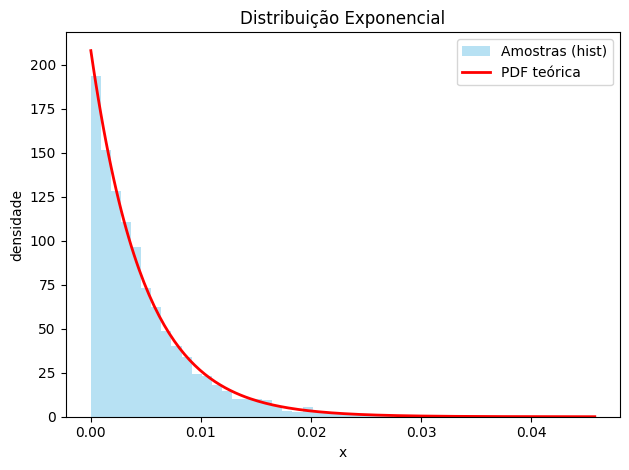

In [7]:

n_samples = 5000   # tamanho da amostra
rng = np.random.default_rng(seed=42)

# amostrar distribuição exponencial
samples = rng.exponential(scale=1/lambda_param, size=n_samples)

# histograma normalizado (estimativa da pdf)
counts, bins, _ = plt.hist(
    samples,
    bins=50,
    density=True,
    alpha=0.6,
    color="skyblue",
    label="Amostras (hist)"
)

# pdf teórica
x = np.linspace(0, bins[-1], 200)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, "r-", lw=2, label="PDF teórica")

plt.title("Distribuição Exponencial")
plt.xlabel("x")
plt.ylabel("densidade")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
lambda_param

np.float64(207.95)

# 15.2

In [17]:
first_moment = np.mean(dataset_B)
ln_first = np.log(first_moment)

In [18]:
second_moment = np.mean(np.array(dataset_B)**2)
ln_second = np.log(second_moment)

In [20]:
# y: variancia 
# x: media
y = ln_second - 2*ln_first
x = 2*ln_first - ln_second/2

In [21]:
x

np.float64(6.323694192667611)

In [22]:
y

np.float64(1.8756235174720235)

# 15.3

In [23]:
a_1 = - np.log(1 - 0.2)
a_2 = - np.log(1 - 0.8)

In [24]:
x_1 = 5
x_2 = 12

In [25]:
k = np.log(a_2/a_1)/np.log(x_2/x_1)

In [27]:
lambda_param = x_1/(a_1**(1/k))

In [28]:
lambda_param

np.float64(9.718649415328901)

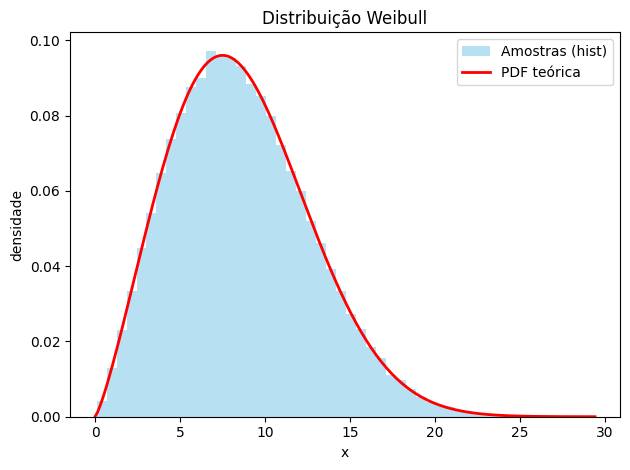

In [29]:
# amostrar
samples = lambda_param * rng.weibull(k, size=100000)

# histograma normalizado (estimativa da pdf)
plt.hist(samples, bins=50, density=True, alpha=0.6, color="skyblue", label="Amostras (hist)")

# pdf teórica
x = np.linspace(0, samples.max(), 200)
pdf = (k / lambda_param) * (x / lambda_param) ** (k - 1) * np.exp(- (x / lambda_param) ** k)
plt.plot(x, pdf, "r-", lw=2, label="PDF teórica")

plt.title("Distribuição Weibull")
plt.xlabel("x")
plt.ylabel("densidade")
plt.legend()
plt.tight_layout()
plt.show()


# 15.4

In [30]:
a_1 = - np.log(1 - 0.5)
a_2 = - np.log(1 - 0.9)

In [31]:
x_1 = 10000
x_2 = 100000

In [32]:
k = np.log(a_2/a_1)/np.log(x_2/x_1)

In [33]:
lambda_param = x_1/(a_1**(1/k))

In [34]:
lambda_param

np.float64(20197.08479452367)

In [35]:
k

np.float64(0.5213902276543247)

# 15.5

In [46]:
sample = [4, 5, 21, 99, 421]

In [47]:
first_moment = np.mean(np.array(sample))
second_moment = np.mean(np.array(sample)**2)

In [48]:
b = second_moment/first_moment**2

In [49]:
alpha_aux = b/(b-2)

In [50]:
alpha = alpha_aux + 1

In [51]:
alpha

np.float64(3.8188924297997713)

In [53]:
theta = alpha_aux*first_moment

In [54]:
theta

np.float64(310.07816727797484)

# 15.7

## Distribuição Lognormal

Assuma que  
$$
X \sim \mathrm{Lognormal}(\mu,\sigma^2)
\quad\Longleftrightarrow\quad
\ln(X)\sim\mathcal N(\mu,\sigma^2)
$$

---

### Função de distribuição acumulada (CDF)

$$
F(x)
=
\mathbb P(X \le x)
=
\Phi\!\left(
\frac{\ln x - \mu}{\sigma}
\right),
\qquad x>0
$$

onde $\Phi(\cdot)$ é a CDF da normal padrão.

---

### Função quantil (inversa da CDF)

Para $p\in(0,1)$,

$$
Q(p)
=
F^{-1}(p)
=
\exp\!\big(
\mu + \sigma\,\Phi^{-1}(p)
\big)
$$

---

### Percentile Matching (dois percentis)

Suponha que sejam conhecidos dois percentis empíricos:

$$
Q(p_1)=x_1,
\qquad
Q(p_2)=x_2
$$

Então:

$$
\ln x_1 = \mu + \sigma z_1,
\qquad
\ln x_2 = \mu + \sigma z_2,
\quad
z_i=\Phi^{-1}(p_i)
$$

Resolvendo o sistema:

$$
\boxed{
\sigma
=
\frac{\ln x_2 - \ln x_1}{z_2 - z_1}
}
$$

$$
\boxed{
\mu
=
\ln x_1 - \sigma z_1
}
$$

---

### Observações

- $x_1,x_2>0$
- $0<p_1<p_2<1$
- A parametrização é sempre em termos da normal subjacente:  
  $\ln(X)\sim\mathcal N(\mu,\sigma^2)$


In [5]:
import numpy as np
from scipy.stats import norm


p1 = 0.20   # primeiro percentil
x1 = 18.25  

p2 = 0.80   # segundo percentil
x2 = 35.8  # 


In [6]:
# z-score
z1 = norm.ppf(p1)
z2 = norm.ppf(p2)

In [7]:
sigma = (np.log(x2) - np.log(x1)) / (z2 - z1)
mu = np.log(x1) - sigma * z1


In [8]:
print("mu =", mu)
print("sigma =", sigma)

mu = 3.2410564867175773
sigma = 0.4002886253937296


In [11]:
samples = rng.lognormal(mean=mu, sigma=sigma, size=1000000)


In [14]:
event = [1 if x > 30 else 0 for x in samples]

In [15]:
np.sum(event)/len(samples)

np.float64(0.344436)

# 15.11

In [17]:
sample = np.array([1000, 850, 750, 1100, 1250, 900])

In [20]:
first_moment = np.mean(sample)
second_moment = np.mean(sample**2)

ratio = second_moment/first_moment**2

In [21]:
alpha = 1/(ratio - 1)

In [22]:
alpha

np.float64(34.832061068702444)

In [23]:
theta = first_moment/alpha

In [24]:
theta

np.float64(27.991452991452867)

# 15.12

In [26]:
import numpy as np

# --- seus dois percentis (edite aqui) ---
p1, c1 = 0.20, 100.0   # exemplo: mediana = 100
p2, c2 = 0.80, 400.0   # exemplo: p95 = 300

# --- transformações ---
x1 = np.log(p1 / (1 - p1))
x2 = np.log(p2 / (1 - p2))

y1 = np.log(c1)
y2 = np.log(c2)

# --- percentile matching para Log-Logistic(alpha, beta) ---
slope = (y2 - y1) / (x2 - x1)   # slope = 1/beta
beta = 1.0 / slope
ln_alpha = y1 - slope * x1
alpha = np.exp(ln_alpha)

print("alpha =", alpha)
print("beta  =", beta)

# --- checagem: reconstruir os quantis ---
c1_check = alpha * (p1 / (1 - p1)) ** (1 / beta)
c2_check = alpha * (p2 / (1 - p2)) ** (1 / beta)

print("c1 reconstruído =", c1_check)
print("c2 reconstruído =", c2_check)


alpha = 199.99999999999991
beta  = 2.0000000000000013
c1 reconstruído = 100.0
c2 reconstruído = 399.9999999999997


# 15.13

In [29]:
import numpy as np

p = 3.0     # parâmetro da CDF
n = 100000
rng = np.random.default_rng(42)

u = rng.uniform(0, 1, size=n)
samples = u ** (1.0 / p)


In [30]:
first_moment = np.mean(samples)

In [31]:
p_estimate = first_moment/(1 - first_moment)

In [32]:
p_estimate

np.float64(3.0054031655836195)

# 15.14

In [36]:
sample = np.array([1500, 6000, 3500, 3800, 1800, 5500, 4800, 4200, 3900, 3000])

In [37]:
first_moment = np.mean(sample)
second_moment = np.mean(sample**2)

ratio = second_moment/first_moment**2

In [38]:
alpha = 1/(ratio - 1)

In [39]:
theta = first_moment/alpha

In [40]:
alpha

np.float64(7.632135306553905)

In [41]:
theta

np.float64(497.89473684210566)

# 15.15

In [42]:
sample = np.array([500, 1000, 1500, 2500, 4500])

In [43]:
import numpy as np

# --- dois primeiros momentos brutos ---
m1 = np.mean(sample)    # E[X]
m2 = np.mean(sample**2)  # E[X^2]

# --- moment matching ---
sigma2 = np.log(m2 / m1**2)
sigma = np.sqrt(sigma2)
mu = np.log(m1) - sigma2 / 2

print("mu =", mu)
print("sigma =", sigma)



mu = 7.398169905488
sigma = 0.6367614216550531


In [44]:
samples = rng.lognormal(mean=mu, sigma=sigma, size=100000)

In [45]:
event = [1 if x > 4500 else 0 for x in samples]

In [46]:
np.sum(event)/len(samples)

np.float64(0.05662)

# 15.16

In [47]:
sample = np.array([4.9, 1.8, 3.4, 6.9, 4.0])

In [49]:
first_moment = np.mean(sample)

In [50]:
beta = 2*first_moment/np.sqrt(2*np.pi)

In [51]:
beta

np.float64(3.351115155372035)

# 15.17

In [53]:
sample = np.array([43, 145, 233, 396, 775])

In [54]:
first_moment = np.mean(sample)

In [59]:
alpha = 1000/first_moment +1

In [60]:
alpha

np.float64(4.14070351758794)

# 15.21

In [79]:
sample = np.array([54, 70, 75, 81, 84, 88, 97, 105, 109, 114, 122, 125, 128, 139, 146, 153])


In [80]:
p1 = 20  # percentil
q1 = np.percentile(sample, p1, method="linear")
p2 = 70
q2 = np.percentile(sample, p2, method="linear")

In [83]:
x = np.sort(sample)          # sample com n=16
n = len(x)

def Q_smooth(p):
    h = (n + 1) * p
    j = int(np.floor(h))
    g = h - j
    if j <= 0: return x[0]
    if j >= n: return x[-1]
    return (1 - g) * x[j-1] + g * x[j]

p1, p2 = 0.2, 0.7
q1, q2 = Q_smooth(p1), Q_smooth(p2)

a1, a2 = -np.log(1 - p1), -np.log(1 - p2)
k  = np.log(a2 / a1) / np.log(q2 / q1)
lam = q1 / (a1 ** (1 / k))

print(q1, q2)
print("k =", k)
print("lambda =", lam)


77.4 124.7
k = 3.534245479021882
lambda = 118.31949335518493


In [84]:
len(sample)

16

# 15.22


\begin{cases}
\mathbb{E}(X) = \delta + \theta = 300, \\[6pt]
Q(0.5) = \delta - \theta \ln(0.5) = 240.
\end{cases}



In [85]:
import numpy as np

A = np.array([[1, 1],
              [1, -np.log(0.5)]])

b = np.array([300, 240])

delta, theta = np.linalg.solve(A, b)

print("delta =", delta)
print("theta =", theta)


delta = 104.46651880374424
theta = 195.53348119625576
